# Observations

* As seen from the pie plots, both the male and female mice population were evenly distributed for the study as males constitued 51% of the clinical data while females constitued 49%. 
* Based on the box plots, Capomulin and Ramicane are far more effective in reducing the final tumor volume compared to Infubinol and Ceftamin.
* From the linear regression analysis, we can see a strong positive correlation of 0.84 between mouse weight and average tumor volume. This indicates that as a mouse's weight increases, the average tumor volume also increases. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
no_of_mice = combined_df['Mouse ID'].nunique()
no_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
no_of_mice_clean = clean_df['Mouse ID'].nunique()
no_of_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_drug = clean_df.groupby('Drug Regimen')
tumor_mean = grouped_drug['Tumor Volume (mm3)'].mean()
tumor_median = grouped_drug['Tumor Volume (mm3)'].median()
tumor_variance = grouped_drug['Tumor Volume (mm3)'].var()
tumor_std = grouped_drug['Tumor Volume (mm3)'].std()
tumor_sem = grouped_drug['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Std. Dev': tumor_std,
    'Tumor Volume Std. Err.': tumor_sem
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggregation = grouped_drug.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_statistics_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

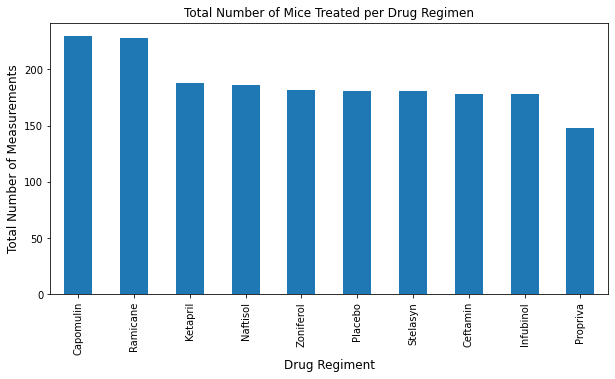

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
no_of_measurements = grouped_drug['Mouse ID'].count()

pandas_bar = no_of_measurements.sort_values(ascending=False).plot.bar(figsize=(10,5), fontsize=10)

plt.title('Total Number of Mice Treated per Drug Regimen', fontsize=12)
plt.xlabel('Drug Regiment', fontsize=12)
plt.ylabel('Total Number of Measurements', fontsize=12)

plt.show()

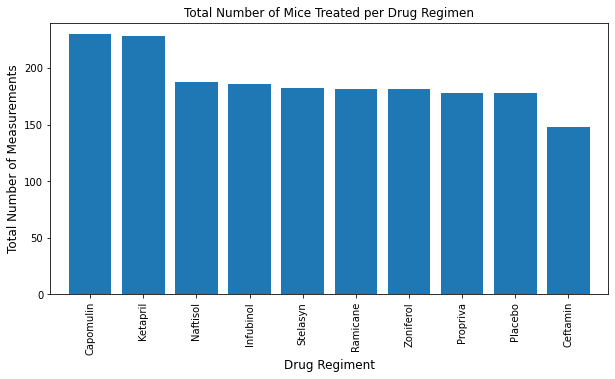

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_values = clean_df['Drug Regimen'].unique()
y_values = clean_df['Drug Regimen'].value_counts()

fig1, ax1 = plt.subplots(figsize=(10,5))
plt.bar(x_values, y_values)

plt.title('Total Number of Mice Treated per Drug Regimen', fontsize=12)
plt.xlabel('Drug Regiment', fontsize=12)
plt.ylabel('Total Number of Measurements', fontsize=12)
plt.xticks(rotation=90)

plt.xlim(-0.75, len(x_values)-0.25)
plt.ylim(0, max(y_values)+10)

plt.show()

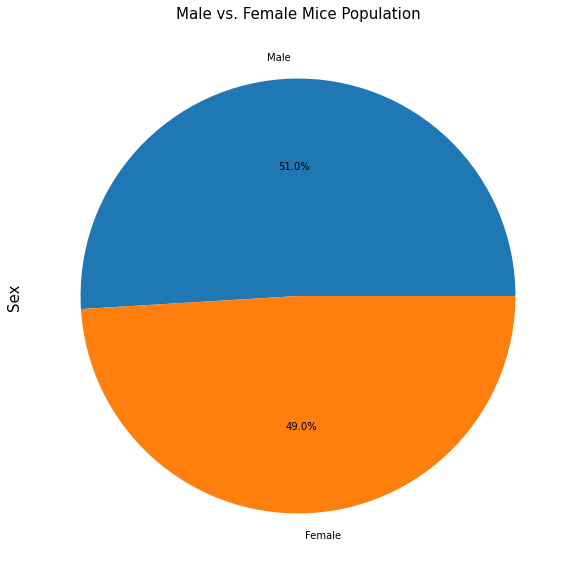

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_df['Sex'].value_counts()

pandas_pie = gender_distribution.plot.pie(figsize=(15,10), autopct='%1.1f%%')

plt.title('Male vs. Female Mice Population', fontsize=15)
plt.ylabel('Sex', fontsize=15)

plt.show()

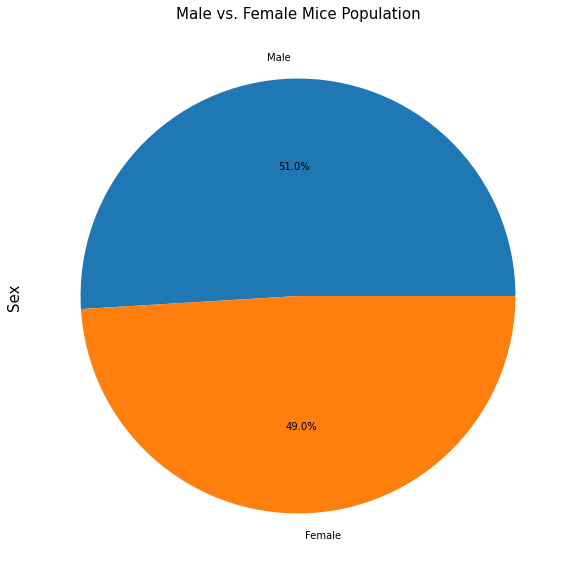

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
pie_distribution = clean_df['Sex'].value_counts()/clean_df['Sex'].count()

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.pie(pie_distribution, labels=labels, autopct="%1.1f%%")

plt.title('Male vs. Female Mice Population', fontsize=15)
plt.ylabel('Sex', fontsize=15)

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_final = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
ramicane_final = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', :]
infubinol_final = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol', :]
ceftamin_final = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin', :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_final.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane_final.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol_final.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin_final.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_last, clean_df, on=(['Mouse ID', 'Timepoint']), how='left')
ramicane_merge = pd.merge(ramicane_last, clean_df, on=(['Mouse ID', 'Timepoint']), how='left')
infubinol_merge = pd.merge(infubinol_last, clean_df, on=(['Mouse ID', 'Timepoint']), how='left')
ceftamin_merge = pd.merge(ceftamin_last, clean_df, on=(['Mouse ID', 'Timepoint']), how='left')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_tumor_volumes = [capomulin_merge, ramicane_merge, infubinol_merge, ceftamin_merge]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in list_of_tumor_volumes:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = x['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    tumor_vol_data.append(x['Tumor Volume (mm3)'])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{x['Drug Regimen'].unique()[0]}'s potential outliers: {lower_bound} {upper_bound}")

Capomulin's potential outliers: 20.70456164999999 51.83201549
Ramicane's potential outliers: 17.912664470000003 54.30681135
Infubinol's potential outliers: 36.83290494999999 82.74144559000001
Ceftamin's potential outliers: 25.355449580000002 87.66645829999999


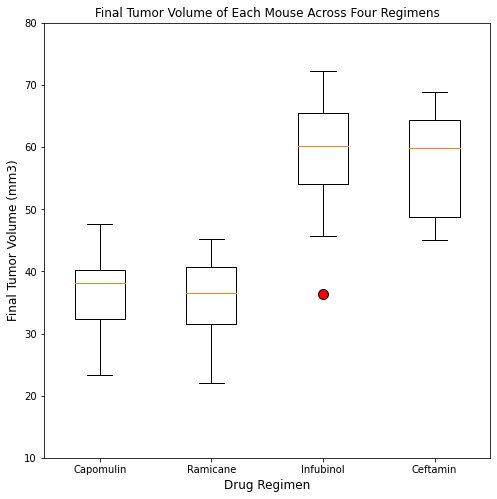

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(8,8))
plt.boxplot(tumor_vol_data, labels=drug_regimen, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})

ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens', fontsize=12)
ax1.set_xlabel('Drug Regimen', fontsize=12)
ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)

plt.ylim(10,80)

plt.show()

## Line and Scatter Plots

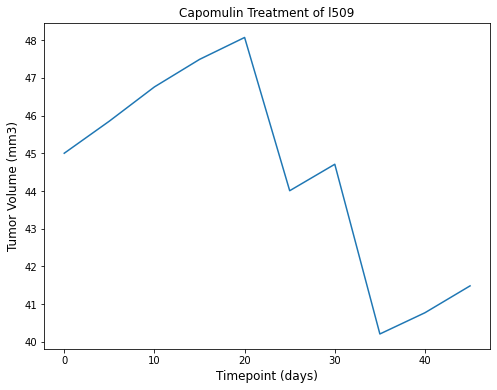

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = capomulin_final.loc[capomulin_final['Mouse ID'] == 'l509', :]

x_axis = mouse_l509['Timepoint']
y_axis = mouse_l509['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.plot(x_axis, y_axis)

plt.title('Capomulin Treatment of l509', fontsize=12)
plt.xlabel('Timepoint (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

plt.show()

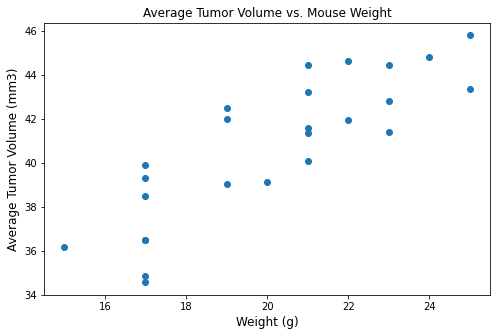

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_tumor_mean = capomulin_final.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(capomulin_tumor_mean['Weight (g)'], capomulin_tumor_mean['Tumor Volume (mm3)'])

plt.title('Average Tumor Volume vs. Mouse Weight', fontsize=12)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


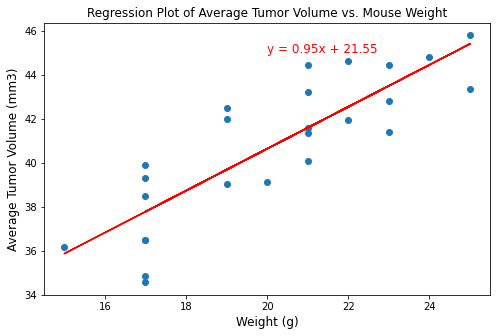

The r-squared is: 0.7088568047708717


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_tumor_mean['Weight (g)'], capomulin_tumor_mean['Tumor Volume (mm3)'])[0], 2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

x_values = capomulin_tumor_mean['Weight (g)']
y_values = capomulin_tumor_mean['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.title('Regression Plot of Average Tumor Volume vs. Mouse Weight', fontsize=12)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.annotate(line_eq, (20,45), fontsize=12, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}")